# Phase II goal:
# Select diseases with verified genetic links and strong market potential

### Example of health statistics
Below is a plot showing a snapshot of the time-evolution of the US population across a 50 year gap, 1960-2010. Clearly there is a huge population at 45-60 that will be reaching retirement age soon suggesting a large market developing for treatments of aging-related diseases.

The data is from The World Bank's HealthStats database.<br>
http://data.worldbank.org/topic/health

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

%matplotlib inline

In [2]:
health = 'HNPStats-Data.csv'

# Roll through gzip csv file using pandas reader
readerh = pd.read_csv(health, sep=',', iterator=True, chunksize=10000)

# Concatenate to build dataframe
dfh = pd.concat(readerh, ignore_index=True)

In [3]:
# Isolate relevant data
dfpop = dfh[(dfh['Indicator Code'].str.contains('SP.POP')) & 
            (dfh['Country Name']=='United States')]
dfnew = dfpop[~dfpop['Indicator Name'].str.contains('%')]
dfnew = dfnew[~dfnew['Indicator Name'].str.contains('Age')]
dffemale = dfnew[dfnew['Indicator Name'].str.contains('^Female')]
dfmale = dfnew[dfnew['Indicator Name'].str.contains('^Male')]
dffemale.shape, dfmale.shape

((17, 60), (17, 60))

In [4]:
dffemale

,Indicator Name,Indicator Code,Country Name,Country Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
23452,Female population 00-04,SP.POP.0004.FE,United States,USA,9861449,9969017,9961475,9860818,9712001,9538861,...,9954928,10035849,10005959,9928891,9868244,9848425,9776359,9690818,9628816,NaN
23699,Female population 05-09,SP.POP.0509.FE,United States,USA,9176265,9350772,9526951,9701821,9858884,9958625,...,9515871,9606187,9737304,9863058,9931838,9963715,10005135,10043786,10072171,NaN
23946,Female population 10-14,SP.POP.1014.FE,United States,USA,8211916,8490094,8718624,8910582,9092310,9273332,...,10204367,10140382,10084580,10054747,10068199,9998130,9962935,9980136,10031355,NaN
24193,Female population 15-19,SP.POP.1519.FE,United States,USA,6570746,6920982,7299947,7677605,8023754,8317092,...,10390461,10453739,10519997,10560535,10571066,10630074,10591178,10441414,10237806,NaN
24440,Female population 20-24,SP.POP.2024.FE,United States,USA,5634671,5782701,5972224,6209068,6492852,6805012,...,10307433,10385672,10441119,10480863,10521006,10593452,10732605,10939307,11144273,NaN
24687,Female population 25-29,SP.POP.2529.FE,United States,USA,5502956,5476715,5486044,5530952,5613742,5733421,...,9861496,10013218,10182124,10332004,10446487,10586211,10669342,10678575,10665251,NaN
24934,Female population 30-34,SP.POP.3034.FE,United States,USA,6035181,5934510,5822834,5713937,5626346,5565888,...,9848480,9857107,9889559,9943841,10024810,10048348,10166386,10391738,10660900,NaN
25181,Female population 35-39,SP.POP.3539.FE,United States,USA,6284795,6294724,6270860,6217643,6144941,6054638,...,10268375,10178693,10134813,10110319,10094596,10101346,10057636,9943116,9815317,NaN
25428,Female population 40-44,SP.POP.4044.FE,United States,USA,5854919,5942396,6047675,6153396,6236760,6277722,...,11248574,11064792,10858339,10658886,10495250,10319585,10240607,10269186,10342695,NaN
25675,Female population 45-49,SP.POP.4549.FE,United States,USA,5538852,5570178,5605589,5655935,5726391,5807456,...,11354314,11443398,11488682,11468152,11383585,11273641,11063407,10766100,10455134,NaN


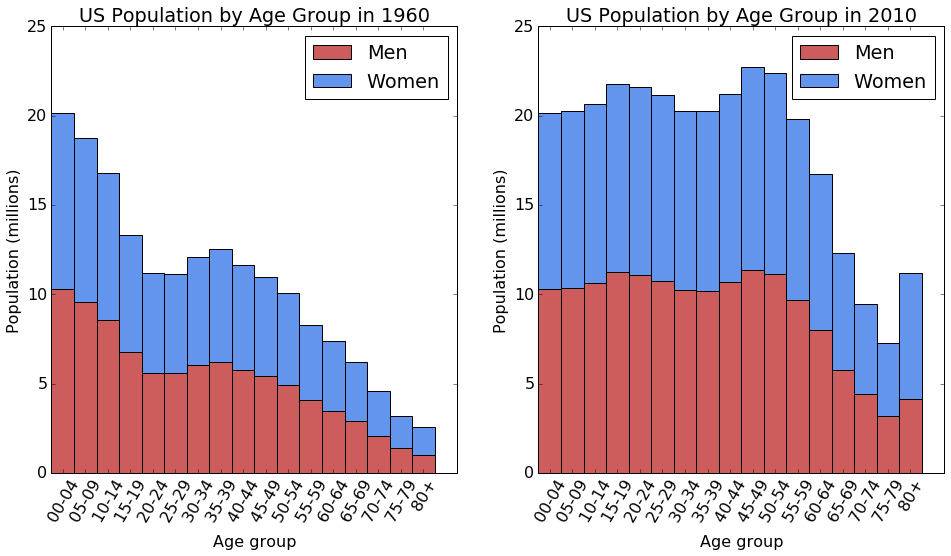

In [5]:
# Stacked bar plot showing age breakdown of US population at 50 year interval
yrrng = range(1960,2010,5)
years = [str(yr) for yr in yrrng]

width=1
n = len(dfmale['1960'])
lbls = dfmale['Indicator Name'].str.replace('Male population','').tolist()
yrdate = ['1960','2010']
plt.ioff()

plt.rc('font', size='16')

fig, axes = plt.subplots(1,2,figsize=(16,8))
for ax,yr in zip(axes,yrdate):
    ax.bar(range(n), dfmale[yr]/1e6, width, color='IndianRed')
    ax.bar(range(n), dffemale[yr]/1e6, width, color='CornflowerBlue', 
                bottom=dfmale[yr]/1e6)
    ax.set_xlabel('Age group')
    ax.set_xticks(np.arange(n) + width/2.)
    ax.set_xticklabels(lbls, rotation=60)
    ax.legend(('Men', 'Women'))
    ax.set_ylabel('Population (millions)')
    ax.set_title('US Population by Age Group in '+yr)
    
    
    
plt.show()

In [6]:
# Combine male and female data for each age group and year
dftot = dfmale.append(dffemale)
# dftot = dftot.set_index('Indicator Name')
dftot = dftot.set_index(np.arange(dftot.shape[0]))

# Remove non-numerical data
for col in ['Indicator Code','Country Name','Country Code']:
    dftot = dftot.drop(col, axis=1)

# Remove columns will all NaN values
for col in dftot.columns:
    if len(dftot[col].value_counts())==0:
        dftot = dftot.drop(col, axis=1)

# Remove male, female, population from Indicator Name
crop1 = 'Male population '
crop2 = 'Female population '
dftot['Indicator Name'] = dftot['Indicator Name'].str.replace(crop1,'').str.replace(crop2,'')
dftot.head()

,Indicator Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,00-04,10269373,10381644,10334693,10167349,9954960,9746111,9503760,9290676,9111515,...,10132174,10365883,10445317,10411857,10332471,10275163,10265205,10200023,10120318,10063815
1,05-09,9548513,9728942,9923323,10121776,10295794,10391790,10440968,10423310,10340220,...,9935687,9964674,10050400,10176055,10295173,10355459,10372926,10409975,10452754,10489391
2,10-14,8584499,8860346,9092436,9291881,9485709,9683939,9895291,10107282,10289614,...,10834208,10767625,10698204,10637741,10601535,10607821,10510529,10451400,10447733,10480250
3,15-19,6745032,7096394,7481462,7881060,8259996,8584915,8774265,8944849,9144755,...,11060066,11075494,11113626,11166720,11208214,11230586,11290048,11241995,11070869,10836790
4,20-24,5563854,5745697,5963238,6203822,6465209,6745846,7099716,7420955,7666580,...,10776578,10869428,10933388,10984144,11030595,11085990,11195863,11373314,11617979,11855005


In [7]:
# If the last 5 chars are equal, create new dataframe dropping 'Indicator Name' and sum the columns 
# then append to new dataframe
# [s[-5:] for s in sorted(list(set(dftot['Indicator Name'].tolist())))]

import re
p = re.compile('\D+')
poplbls = sorted(list(set([p.split(s,1)[1] for s in dftot['Indicator Name'].tolist()])))

In [8]:
# # Drop male, female, population from Indicator Name and sum dfmale and dffemale
# dfmale['Indicator Name'] = dfmale['Indicator Name'].str.replace('Male population ','')
# dffemale['Indicator Name'] = dffemale['Indicator Name'].str.replace('Female population ','')

# # Remove non-numerical data
# for col in ['Indicator Code','Country Name','Country Code']:
#     dfmale = dfmale.drop(col, axis=1)
#     dffemale = dffemale.drop(col, axis=1)
    
# # Remove columns will all NaN values
# for col in dfmale.columns:
#     if len(dfmale[col].value_counts())==0:
#         dfmale = dfmale.drop(col, axis=1)
        

In [9]:
# Sum dataframes to get total population at each year
dftot = dftot.set_index('Indicator Name')
dfcomb = dftot[:int(dftot.shape[0]/2)] + dftot[int(dftot.shape[0]/2):]

In [46]:
# A bit messy so combine age groups, 17 down to 5
dfsum = pd.DataFrame(columns=dfcomb.columns, index=['00-19','20-39','40-59','60-79','80+'])
for i in range(dfcomb.shape[0]//4):
    dfsum.ix[i] = dfcomb[i*4:4*(i+1)-1].sum(axis=0).astype(int)
dfsum.ix[-1] = dfcomb.ix[-1].astype(int)

dfsum

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
00-19,55652015,56780815,57557502,58054227,58399658,58592658,58648104,58594247,58405962,58107960,...,60368701,60773348,60976339,61053496,61075875,61106724,60958930,60805827,60735545,60765798
20-39,34364811,34467523,34706420,35102638,35684849,36424643,37351515,38417035,39562576,40773017,...,60657223,61057910,61528193,62046466,62545845,63030249,63575405,64342634,65320523,66340107
40-59,32639796,33090832,33521274,33914420,34271419,34563873,34837371,35097822,35312902,35484229,...,65394171,65859127,66204034,66423361,66458160,66328453,66002708,65637100,65251023,64808717
60-79,18188070,18401290,18597179,18784342,19001293,19267567,19561745,19920837,20306719,20702822,...,31889977,32834662,34027309,35421711,36919462,38481135,39945495,41468539,43040866,44665327
80+,2547551,2718034,2864668,2977596,3053752,3094152,3283817,3447027,3576230,3670647,...,10029919,10336642,10623394,10882640,11084626,11214595,11429622,11617411,11790736,11947885


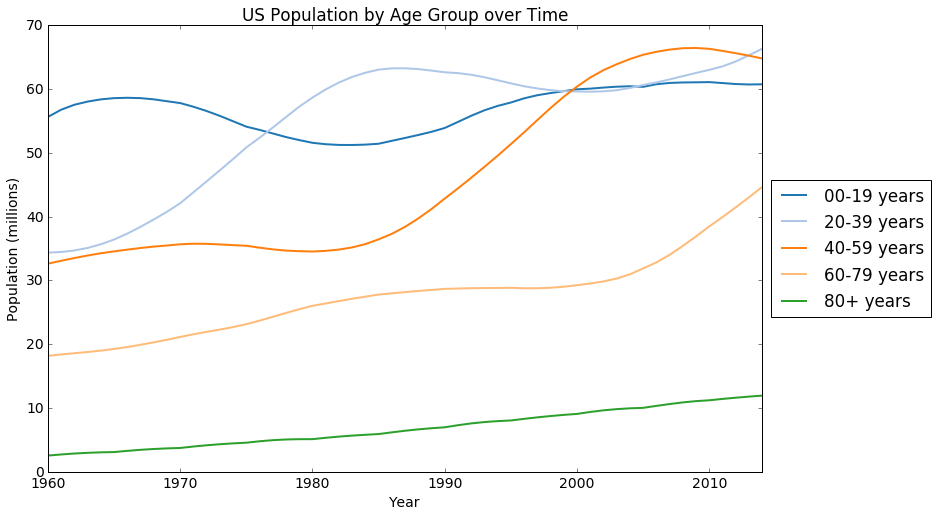

In [16]:
# Create line plot showing trends in population aging (graying)


# Generate colors for graphs
colorseq = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c',
            '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5',
            '#8c564b', '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f',
            '#c7c7c7', '#bcbd22', '#dbdb8d', '#17becf', '#9edae5']


# Line plot showing age breakdown of US population over 50+ year interval
years = [int(s) for s in dfcomb.columns.tolist()]

lbls = dfsum.index.tolist()
n = len(lbls)
yy = dfsum/1e6

plt.rc('font', size='14')

# with plt.style.context(('ggplot')):
fig, ax = plt.subplots(1, figsize=(16,8))
for i in range(n):
    plt.plot(years, yy.ix[i], color=colorseq[i], label=lbls[i], lw=2) #color=colors[i],
# ax.set_xticklabels(years) #, rotation=60)
ax.set_xlabel('Year')
ax.set_ylabel('Population (millions)')
ax.set_title('US Population by Age Group over Time')
ax.set_xlim(years[0],years[-1])

# Shrink current axis by 20% and place legend outside
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend([s+' years' for s in lbls],bbox_to_anchor=(1,0.5),loc='center left')

plt.show()

In [100]:
# Quick extrapolation over next 10 years by fitting linear trendline to previous 5 years

xx = [2010,2011,2012,2013,2014]
xnew = np.arange(2015,2025,1)
ynew = np.zeros((dfsum.shape[0],len(xnew)))
for i in range(dfsum.shape[0]):
    p = np.polyfit(xx,dfsum.ix[i][-5:],1)
    ynew[i,:] = np.polyval(p,xnew)
dftrend = pd.DataFrame(ynew.astype(int), columns=[str(i) for i in xnew], index=dfsum.index.values.tolist())
dfextrap = pd.concat((dfsum, dftrend), axis=1)
dfextrap

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
00-19,55652015,56780815,57557502,58054227,58399658,58592658,58648104,58594247,58405962,58107960,...,60602993,60512469,60421946,60331422,60240898,60150375,60059851,59969327,59878804,59788280
20-39,34364811,34467523,34706420,35102638,35684849,36424643,37351515,38417035,39562576,40773017,...,67031233,67867717,68704200,69540684,70377167,71213650,72050134,72886617,73723101,74559584
40-59,32639796,33090832,33521274,33914420,34271419,34563873,34837371,35097822,35312902,35484229,...,64468253,64089137,63710021,63330905,62951790,62572674,62193558,61814443,61435327,61056211
60-79,18188070,18401290,18597179,18784342,19001293,19267567,19561745,19920837,20306719,20702822,...,46159398,47705774,49252149,50798525,52344900,53891276,55437651,56984027,58530402,60076778
80+,2547551,2718034,2864668,2977596,3053752,3094152,3283817,3447027,3576230,3670647,...,12148358,12331127,12513896,12696666,12879435,13062205,13244974,13427743,13610513,13793282


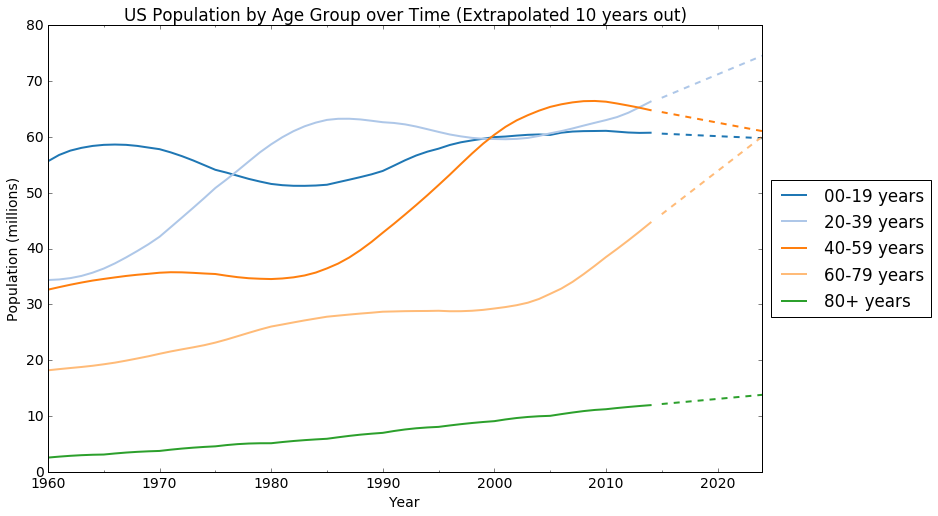

In [104]:
# Add this information to previous graph

yrtrends = [str(i) for i in xnew]
yextrap = dfextrap[yrtrends]/1e6

plt.rc('font', size='14')

# with plt.style.context(('ggplot')):
fig, ax = plt.subplots(1, figsize=(16,8))
for i in range(n):
    plt.plot(years, yy.ix[i], color=colorseq[i], label=lbls[i], lw=2)
for i in range(n):
    plt.plot(yrtrends, yextrap.ix[i], color=colorseq[i], label=lbls[i], lw=2, ls='--')
# ax.set_xticklabels(years) #, rotation=60)
ax.set_xlabel('Year')
ax.set_ylabel('Population (millions)')
ax.set_title('US Population by Age Group over Time (Extrapolated 10 years out)')
ax.set_xlim(years[0],int(yrtrends[-1]))
ax.xaxis.set_minor_locator(AutoMinorLocator(2))

# Shrink current axis by 20% and place legend outside
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend([s+' years' for s in lbls],bbox_to_anchor=(1,0.5),loc='center left')

plt.show()

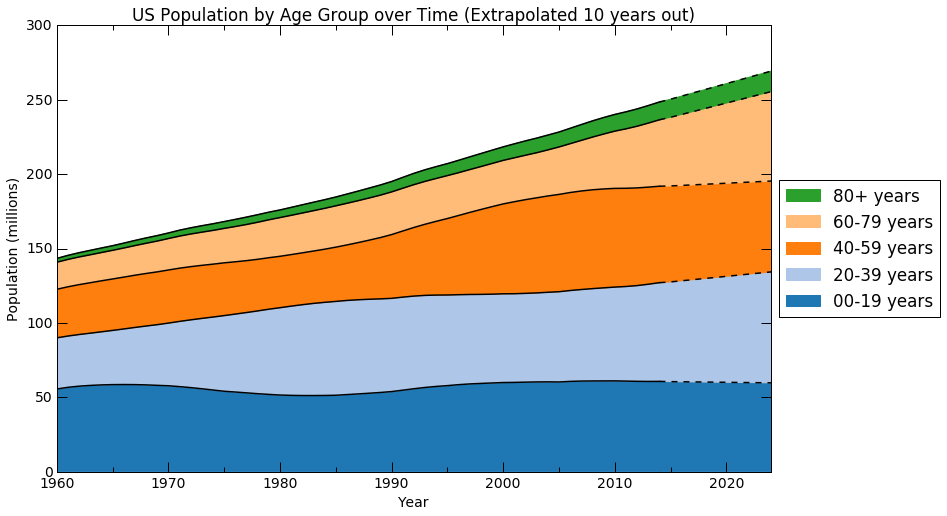

In [124]:
# Add this information to previous graph

import matplotlib.patches as mpatches

yrtrends = np.arange(2014,2025)
idxtrend = [str(i) for i in yrtrends]
yextrap = dfextrap[idxtrend]/1e6

plt.rc('font', size='14')

# with plt.style.context(('ggplot')):
fig, ax = plt.subplots(1, figsize=(16,8))

patches=[]

for i in range(n):
    if i==0:
        ysum = yy.ix[0]
        plt.fill_between(years,ysum,color=colorseq[i])
        ytsum = yextrap.ix[0]
        plt.fill_between(yrtrends,ytsum,color=colorseq[i])
    else:
        ysum = ysum + yy.ix[i]
        plt.fill_between(years,ysum,ysum-yy.ix[i],color=colorseq[i])
        ytsum = ytsum + yextrap.ix[i]
        plt.fill_between(yrtrends,ytsum,ytsum-yextrap.ix[i],color=colorseq[i])
    plt.plot(years, ysum, color='k', lw=1.5)
    plt.plot(yrtrends, ytsum, color='k', lw=1.5, ls='--')
    patches.append(mpatches.Patch(color=colorseq[n-1-i], label=lbls[n-1-i]+' years'))
#     plt.axvline(2014,color='k',lw=1,ls='--')
ax.set_xlabel('Year')
ax.set_ylabel('Population (millions)')
ax.set_title('US Population by Age Group over Time (Extrapolated 10 years out)')
ax.set_xlim(years[0],yrtrends[-1])
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.tick_params('both', length=10, width=1, which='major')
ax.tick_params('both', length=5, width=1, which='minor')

# Shrink current axis by 20% and place legend outside
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(handles=patches, bbox_to_anchor=(1,0.5),loc='center left')

plt.show()